In [1]:
import numpy as np
from keras.datasets import fashion_mnist



In [2]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [8]:
print ("Number of samples/observations in training data: " + str(len(X_train)))

Number of samples/observations in training data: 60000


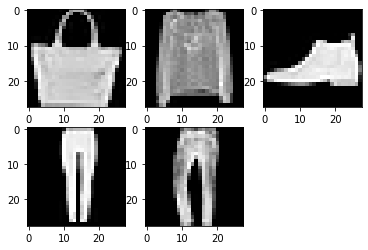

In [3]:
import matplotlib.pyplot as plt
plt.subplot(231)
random_num=np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(232)
random_num=np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num],cmap=plt.get_cmap('gray'))
plt.subplot(233)
random_num=np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num],cmap=plt.get_cmap('gray'))
plt.subplot(234)
random_num=np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num],cmap=plt.get_cmap('gray'))
plt.subplot(235)
random_num=np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num],cmap=plt.get_cmap('gray'))

plt.show()

In [4]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization
from keras import backend as K
Batch_size = 128
epochs=100
img_rows=X_train[0].shape[0]
img_columns=X_train[1].shape[0]
X_train=X_train.reshape(X_train.shape[0],img_rows,img_columns,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_columns,1)
input_shape = (img_rows,img_columns,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
num_pixels= X_train.shape[1]*X_train.shape[2]
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

print(model.summary())





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [6]:
model_fitting=model.fit(X_train,y_train,batch_size=Batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test))
score=model.evaluate(X_test,y_test,verbose=0)
print('Test_loss',score[0])
print('Test_accuracy',score[1])

Epoch 1/100
469/469 [==============================] - 51s 12ms/step - loss: 3.0811 - accuracy: 0.1798 - val_loss: 1.5187 - val_accuracy: 0.4861
Epoch 2/100
469/469 [==============================] - 5s 10ms/step - loss: 1.6721 - accuracy: 0.4634 - val_loss: 0.8542 - val_accuracy: 0.7037
Epoch 3/100
469/469 [==============================] - 5s 10ms/step - loss: 1.2825 - accuracy: 0.5852 - val_loss: 0.7380 - val_accuracy: 0.7392
Epoch 4/100
469/469 [==============================] - 5s 10ms/step - loss: 1.1002 - accuracy: 0.6452 - val_loss: 0.6750 - val_accuracy: 0.7606
Epoch 5/100
469/469 [==============================] - 5s 10ms/step - loss: 1.0019 - accuracy: 0.6740 - val_loss: 0.6325 - val_accuracy: 0.7727
Epoch 6/100
469/469 [==============================] - 5s 10ms/step - loss: 0.9226 - accuracy: 0.6983 - val_loss: 0.6029 - val_accuracy: 0.7816
Epoch 7/100
469/469 [==============================] - 5s 10ms/step - loss: 0.8726 - accuracy: 0.7116 - val_loss: 0.5781 - val_accuracy